In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
%matplotlib inline
plt.style.use('seaborn-white')

import statsmodels.api as sm
from patsy import dmatrices
import random as rn

In [2]:
rn.seed(1)

In [3]:
x=np.random.normal(0,1,100)
eps=np.random.normal(0,0.25,100)
y=-1+ 0.5*x + eps
len(y)

100

#Vector length is 100

In [4]:
array1 = np.array([x,y])
array1=np.transpose(array1)
dataset=pd.DataFrame(array1)
print(dataset)

           0         1
0   0.011213 -0.964814
1   1.846488  0.403172
2  -0.469880 -1.311513
3  -0.118318 -1.318650
4  -0.476216 -1.205482
..       ...       ...
95 -1.271662 -1.539130
96 -2.056607 -2.129282
97  0.596275 -0.860449
98 -0.242262 -1.032547
99  0.194165 -1.313167

[100 rows x 2 columns]


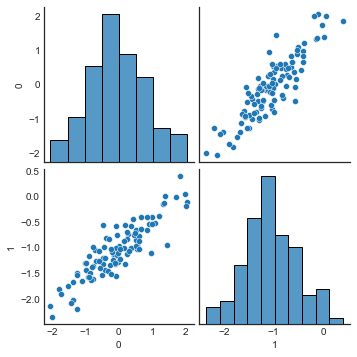

In [5]:
sns.pairplot(dataset)

In [6]:
len(x)

100

In [7]:
results2 = sm.OLS(y,sm.add_constant(x)).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     359.3
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.51e-34
Time:                        18:58:21   Log-Likelihood:                0.51563
No. Observations:                 100   AIC:                             2.969
Df Residuals:                      98   BIC:                             8.179
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0185      0.024    -41.828      0.0

In [8]:
print('beta dash not and beta dash one are greater than beta not and beta one by'+str(1-0.9449)+" and "+str(0.5312-0.5))

beta dash not and beta dash one are greater than beta not and beta one by0.05510000000000004 and 0.031200000000000006


In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y,x=dmatrices('y~x+x**2')
results3 = sm.OLS(y,x).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     359.3
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.51e-34
Time:                        18:58:21   Log-Likelihood:                0.51563
No. Observations:                 100   AIC:                             2.969
Df Residuals:                      98   BIC:                             8.179
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0185      0.024    -41.828      0.0

In [10]:
mod2=sm.OLS(y,x)
res2=mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     359.3
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.51e-34
Time:                        18:58:21   Log-Likelihood:                0.51563
No. Observations:                 100   AIC:                             2.969
Df Residuals:                      98   BIC:                             8.179
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0185      0.024    -41.828      0.0

In [11]:
predictions = results3.get_prediction(dataset)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.504600,0.026007,-0.556210,-0.452990,-0.989916,-0.019285
1,-1.674560,0.046799,-1.767431,-1.581688,-2.165979,-1.183141
2,-0.191827,0.037732,-0.266705,-0.116950,-0.680165,0.296511
3,-0.553541,0.035827,-0.624637,-0.482444,-1.041313,-0.065768
4,-0.131175,0.035075,-0.200781,-0.061569,-0.618733,0.356383
...,...,...,...,...,...,...
95,0.508437,0.053051,0.403160,0.613715,0.014523,1.002351
96,1.006238,0.078116,0.851220,1.161256,0.499387,1.513089
97,-1.047137,0.026730,-1.100182,-0.994092,-1.532607,-0.561667
98,-0.281058,0.028761,-0.338133,-0.223984,-0.766985,0.204869


#eps_less is the less noisy noise vector and eps_more is the  more  noisy noise vector.

In [12]:
x=np.random.normal(0,1,100)
eps_lessn=np.random.normal(0,0.2,100)
eps_moren=np.random.normal(0,1,100)
y=-1+0.5*x+eps_lessn
y2=-1+0.5*x+eps_moren


In [13]:
#less noise
mod=sm.OLS(y,sm.add_constant(x))
res=mod.fit()
print(res.summary())
predictions = res.get_prediction(dataset)
predictions.summary_frame(alpha=0.05)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     699.2
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.12e-46
Time:                        18:58:21   Log-Likelihood:                 19.453
No. Observations:                 100   AIC:                            -34.91
Df Residuals:                      98   BIC:                            -29.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9901      0.020    -48.868      0.0

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.505059,0.018655,-0.542080,-0.468038,-0.906081,-0.104038
1,-1.621813,0.039101,-1.699408,-1.544218,-2.028591,-1.215034
2,-0.206224,0.028143,-0.262073,-0.150375,-0.609420,0.196972
3,-0.557962,0.025922,-0.609403,-0.506522,-0.960571,-0.155353
4,-0.145666,0.026279,-0.197815,-0.093517,-0.548366,0.257034
...,...,...,...,...,...,...
95,0.471094,0.041612,0.388516,0.553673,0.063336,0.878853
96,0.946135,0.061951,0.823195,1.069075,0.528329,1.363941
97,-1.030902,0.019401,-1.069404,-0.992401,-1.432063,-0.629742
98,-0.288768,0.021136,-0.330712,-0.246824,-0.690274,0.112738


In [14]:
#more noise
mod=sm.OLS(y2,sm.add_constant(x))
res=mod.fit()
print(res.summary())
predictions = res.get_prediction(dataset)
predictions.summary_frame(alpha=0.05)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     35.45
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.09e-08
Time:                        18:58:22   Log-Likelihood:                -146.48
No. Observations:                 100   AIC:                             297.0
Df Residuals:                      98   BIC:                             302.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8326      0.106     -7.819      0.0

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.593848,0.098045,-0.788415,-0.399282,-2.701440,1.513744
1,-1.293146,0.205498,-1.700950,-0.885341,-3.430993,0.844702
2,-0.403327,0.147908,-0.696845,-0.109809,-2.522346,1.715692
3,-0.700363,0.136233,-0.970713,-0.430014,-2.816297,1.415571
4,-0.333815,0.138109,-0.607889,-0.059741,-2.450228,1.782598
...,...,...,...,...,...,...
95,0.126345,0.218696,-0.307649,0.560340,-2.016652,2.269343
96,0.422365,0.325588,-0.223754,1.068484,-1.773440,2.618169
97,-1.017747,0.101964,-1.220092,-0.815403,-3.126072,1.090577
98,-0.423837,0.111083,-0.644278,-0.203397,-2.533975,1.686300


#The prediction interval predicts in what range a future individual observation will fall, while a confidence interval shows the likely range of values associated with some statistical parameter of the data, such as the population mean.

In [15]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(x_test)
                    

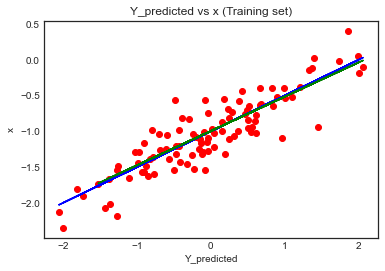

In [19]:
y_actual=-1+ 0.5*x
plt.plot(x, y_actual, color = "blue")
plt.scatter(x,y, color= "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Y_predicted vs x (Training set)")
plt.xlabel("Y_predicted")
plt.ylabel("x")
plt.show()